In [1]:
%pip install requests -q
%pip install bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
url = "https://www.pagina12.com.ar/852427-diego-spagnuolo-y-el-remanido-truco-de-borrar-mensajes"
contenido = requests.get(url).text

In [5]:
print(contenido)

<!DOCTYPE html><!-- Version 2.0.288 --><html class="no-js " lang="es"><head><meta charset="utf-8"><title>Diego Spagnuolo y el remanido truco de borrar mensajes | Las sorpresas que comienzan a aparecer en el celular del extitular de ANDIS | Página|12</title><link rel="canonical" href="https://www.pagina12.com.ar/852427-diego-spagnuolo-y-el-remanido-truco-de-borrar-mensajes"><script async src="https://news.google.com/swg/js/v1/swg.js"></script><style>.ad-slot { min-width: 100%; display:inline-block; }.ad-slot-box { height:250px; margin-bottom: 16px; }.ad-slot-bigbox {height:600px; margin-top:35px; position: sticky; top: 2rem;}.ad-slot-billboard {height:90px}.ad-slot-itt {height:1px;width:1px;display:none;}.ad-slot-zocalo {height:1px;width:1px;display:none;}/*@media screen and (max-width:730px){Mobile}@media screen and (min-width:731px){Desktop}*/</style><script async="async" src="https://securepubads.g.doubleclick.net/tag/js/gpt.js"></script><script type="application/ld+json">{"@context"

In [6]:
soup = BeautifulSoup(contenido, "html.parser")

In [7]:
parrafos = soup.find_all("p")

In [8]:
print(parrafos)

[<p class="am750-live">EN VIVO</p>, <p>Según un primer vistazo sobre los celulares secuestrados, habría decenas de mensajes borrados de Diego Spagnuolo, el extitular de la Agencia Nacional de Discapacidad (ANDIS) envuelto en el escándalo de los audios que se le atribuyen donde se lo escucha hablar de posibles coimas en la compra de medicamentos. La Policía de la Ciudad le incautó dos aparatos el viernes último en un operativo dentro del barrio Altos de Campo Grande en Pilar, donde lo interceptaron al volante de su camioneta Nivus, como si estuviera a punto de escapar. Todos los celulares, como es esperable, son claves para la investigación que lleva adelante el fiscal Franco Picardi. No sólo por el papel que podría tener el propio exfuncionario sino también otros integrantes del gobierno ya que, como surge de las grabaciones filtradas, él se refiere a una trama que involucraría a la secretaria de la Presidencia, Karina Milei, y Eduardo "Lule" Menem, quien trabaja en la órbita de ella, 

In [9]:
h1 = soup.find_all("h1")

In [10]:
print(h1)

[<h1>Diego Spagnuolo y el remanido truco de borrar mensajes</h1>]


In [11]:
italicas = soup.find_all("i")

In [12]:
from collections import Counter

In [13]:
parrafos = str(soup.find_all("p")) # se convierte en string

In [17]:
print(parrafos.count("Diego"))

1


In [18]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [19]:
buscar_palabra("karina")
buscar_palabra("milei")
buscar_palabra("dinero")
buscar_palabra("libra")

Encontraste la palabra 'karina' 9 veces
Encontraste la palabra 'milei' 15 veces
Encontraste la palabra 'dinero' 10 veces
Encontraste la palabra 'libra' 1 veces


## Algo divertido

In [20]:
import random

In [21]:
# 2. Mostrar un pasaje aleatorio de la Noticia
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()

In [22]:
print("\nLee un pasaje aleatorio de la Noticia")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de la Noticia
-------------------------------------------
¿Qué puede haber en una caja de seguridad? No sólo dinero. También documentación, pendrives, algún disco rígido, más allá de otros elementos de valor. La mayoría de esos elementos podrían ser relevantes para el expediente. En Comodoro Py parten del conocimiento de que hay quienes intentan ocultar documentos y pruebas en las bóvedas bancarias. La experiencia reciente del caso $LIBRA, donde las imágenes reveladas por Página/12 de uno de los imputados, el amigo del Presidente, Mauricio Novelli, en el momento que iba a llenar cofres unos días antes del lanzamiento de la moneda. Después, las imágenes exhibieron a su madre y su hermana, cuando fueron a vaciarlas. Todo encendió las alarmas. Pero en esa causa el allanamiento en la entidad bancaria llegó tarde, cuando ya no había nada.
-------------------------------------------
Este párrafo tiene 128 palabras.


## Visualizaciones interesantes


In [30]:
%pip install wordcloud -q
%pip install PIL -q
%pip install nltk -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:

from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [32]:
import matplotlib.pyplot as plt

In [33]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cmpat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [34]:
# Función para limpiar y tokenizar el texto

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias)

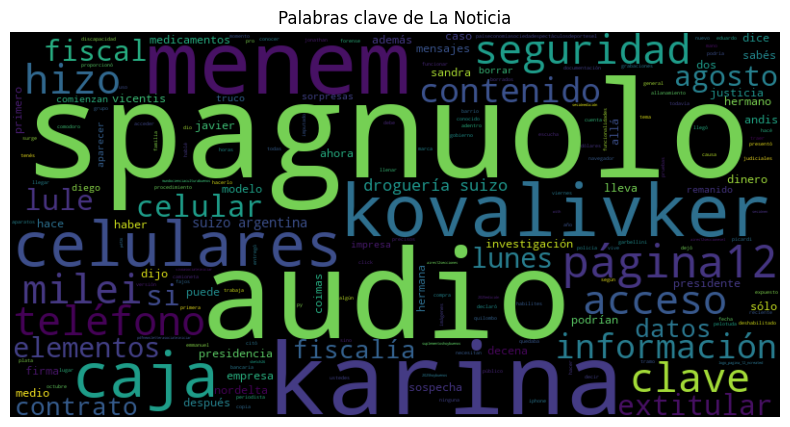

In [35]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Noticia')
plt.show()

In [42]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'audio', 'si', 'elementos', 'contenido',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'página12'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

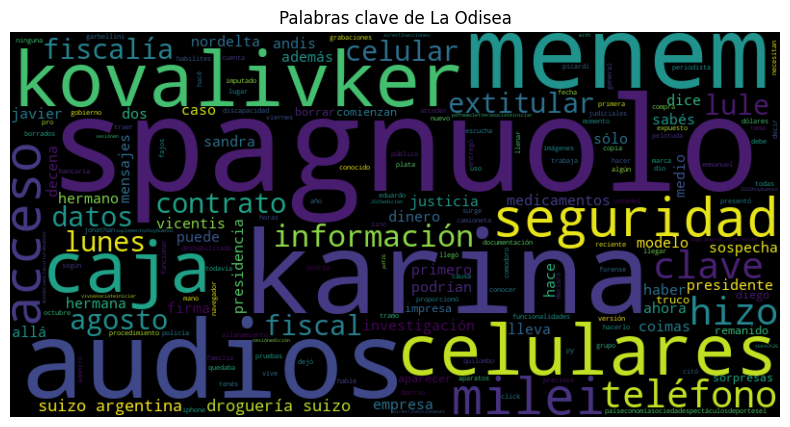

In [43]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()